# Continuous Variables

In [20]:
# Import python packages
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import seaborn as sns
import matplotlib as plt

import functions.continuous as funcs

# Check version numbers
print(f'numpy: {np.version.version}')
print(f'pandas: {pd.__version__}')
print(f'scipy: {sp.__version__}')
print(f'scikit-learn: {sk.__version__}')
print(f'seaborn: {sns.__version__}')
print(f'matplotlib: {plt.__version__}')


numpy: 2.2.3
pandas: 2.2.3
scipy: 1.15.2
scikit-learn: 1.6.1
seaborn: 0.13.2
matplotlib: 3.10.1


In [21]:
df = pd.read_csv('../data/raw/workout_fitness_tracker_data.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   10000 non-null  int64  
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Height (cm)               10000 non-null  int64  
 4   Weight (kg)               10000 non-null  int64  
 5   Workout Type              10000 non-null  object 
 6   Workout Duration (mins)   10000 non-null  int64  
 7   Calories Burned           10000 non-null  int64  
 8   Heart Rate (bpm)          10000 non-null  int64  
 9   Steps Taken               10000 non-null  int64  
 10  Distance (km)             10000 non-null  float64
 11  Workout Intensity         10000 non-null  object 
 12  Sleep Hours               10000 non-null  float64
 13  Water Intake (liters)     10000 non-null  float64
 14  Daily C

In [23]:
df.describe()

,User ID,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.0
mean,5000.50000,38.390100,174.275100,84.903000,64.464800,552.100800,129.526700,10455.496600,7.820745,6.982820,1.900000e+00,2748.428800,69.486500,3.840000e+01,28.5
std,2886.89568,12.171637,14.440986,20.189937,31.814946,260.629908,28.874152,5486.423716,4.159148,1.708738,2.220557e-16,717.109026,11.566763,7.105783e-15,0.0
min,1.00000,18.000000,150.000000,50.000000,10.000000,100.000000,80.000000,1000.000000,0.500000,4.000000,1.900000e+00,1500.000000,50.000000,3.840000e+01,28.5
25%,2500.75000,28.000000,162.000000,67.000000,37.000000,325.000000,105.000000,5673.000000,4.240000,5.500000,1.900000e+00,2124.000000,60.000000,3.840000e+01,28.5
50%,5000.50000,38.000000,174.000000,85.000000,64.000000,554.000000,130.000000,10434.500000,7.850000,7.000000,1.900000e+00,2753.000000,69.000000,3.840000e+01,28.5
75%,7500.25000,49.000000,187.000000,102.000000,92.000000,776.000000,155.000000,15211.000000,11.410000,8.400000,1.900000e+00,3360.000000,80.000000,3.840000e+01,28.5
max,10000.00000,59.000000,199.000000,119.000000,119.000000,999.000000,179.000000,19998.000000,15.000000,10.000000,1.900000e+00,3999.000000,89.000000,3.840000e+01,28.5


In [24]:
df_cont = df[['Workout Type', 'Age', 'Height (cm)', 'Weight (kg)', 'Workout Duration (mins)', 'Calories Burned', 'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Sleep Hours', 'Water Intake (liters)', 'Daily Calories Intake', 'Resting Heart Rate (bpm)', 'VO2 Max', 'Body Fat (%)']]

In [25]:
df_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Workout Type              10000 non-null  object 
 1   Age                       10000 non-null  int64  
 2   Height (cm)               10000 non-null  int64  
 3   Weight (kg)               10000 non-null  int64  
 4   Workout Duration (mins)   10000 non-null  int64  
 5   Calories Burned           10000 non-null  int64  
 6   Heart Rate (bpm)          10000 non-null  int64  
 7   Steps Taken               10000 non-null  int64  
 8   Distance (km)             10000 non-null  float64
 9   Sleep Hours               10000 non-null  float64
 10  Water Intake (liters)     10000 non-null  float64
 11  Daily Calories Intake     10000 non-null  int64  
 12  Resting Heart Rate (bpm)  10000 non-null  int64  
 13  VO2 Max                   10000 non-null  float64
 14  Body Fa

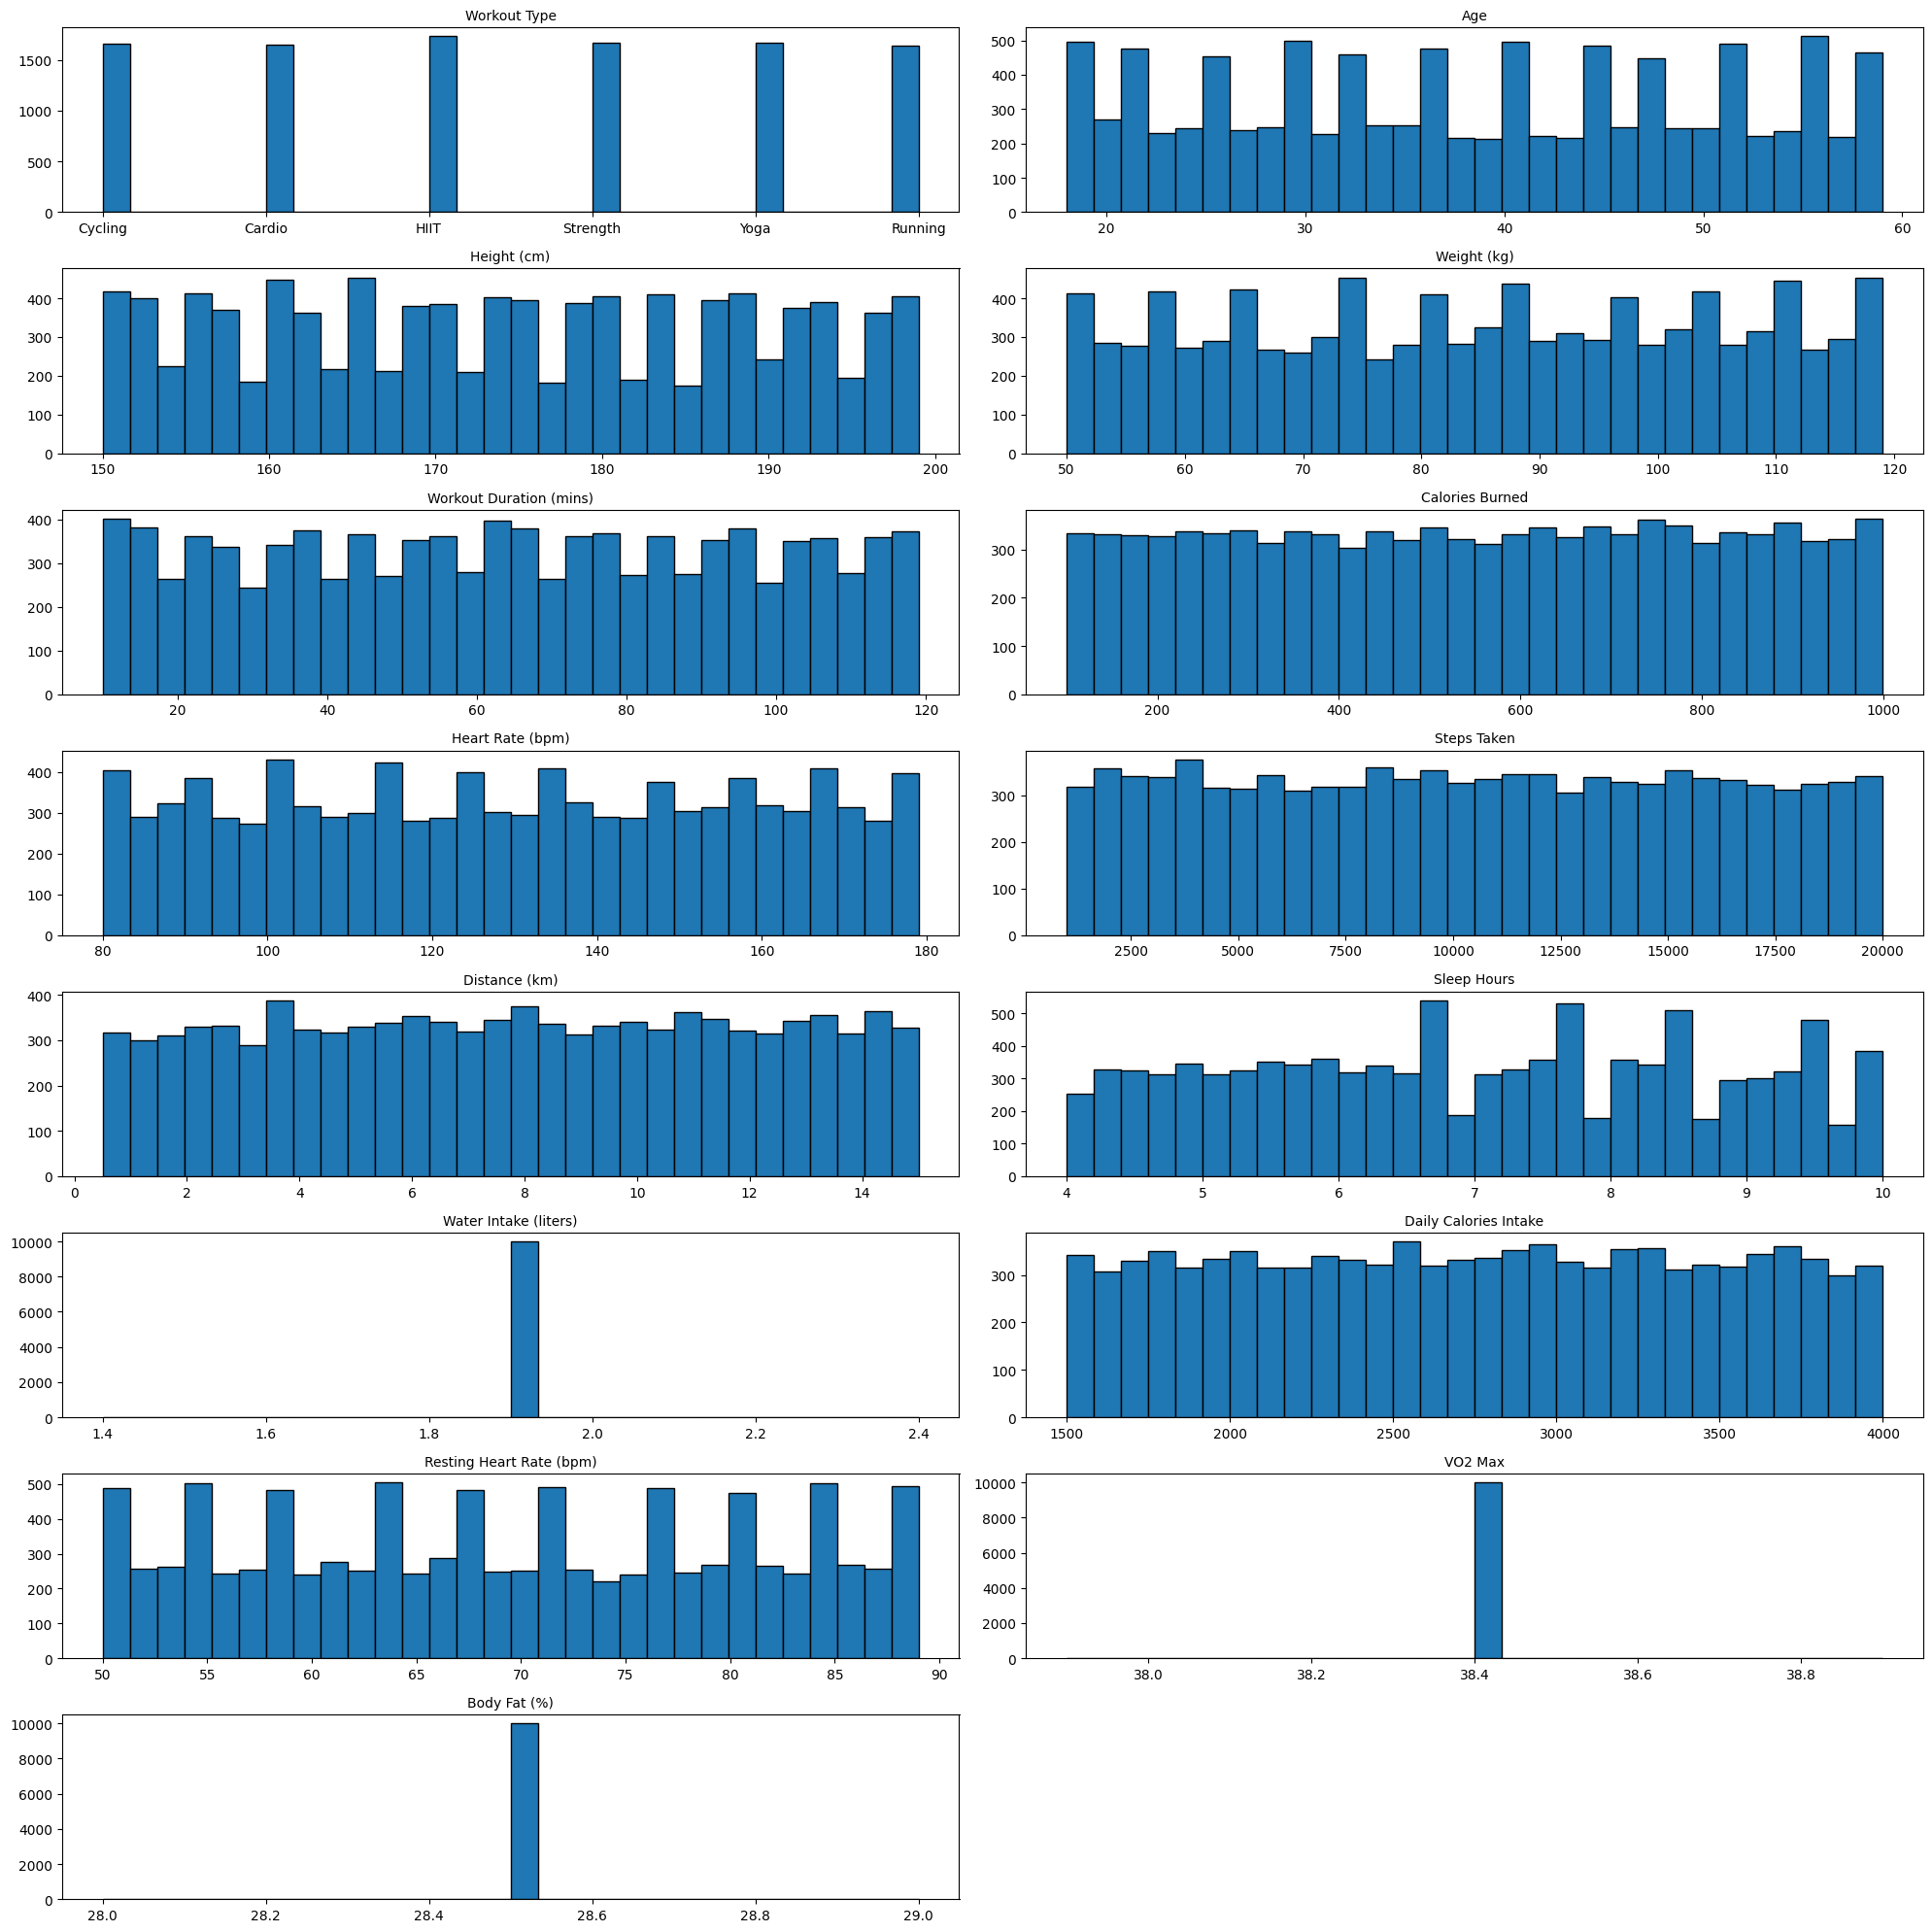

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(20, 20))
axes = axes.flatten()  # Flatten the 2D axes array for easy indexing

for i, column in enumerate(df_cont.columns):
    axes[i].hist(df_cont[column], bins=30, edgecolor='black')
    axes[i].set_title(column, fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove any unused subplots (if fewer than 14 columns)
for j in range(len(df_cont.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [27]:
#Recommendations: remove VO2 Max, Body Fat %, 
df_cont = df_cont.drop(columns=['VO2 Max', 'Body Fat (%)', 'Water Intake (liters)'])

In [28]:
df_cont.head()

,Workout Type,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm)
0,Cycling,39,175,99,79,384,112,8850,14.44,8.2,3195,61
1,Cardio,36,157,112,73,612,168,2821,1.10,8.6,2541,73
2,HIIT,25,180,66,27,540,133,18898,7.28,9.8,3362,80
3,Cycling,56,154,89,39,672,118,14102,6.55,5.8,2071,65
4,Strength,53,194,59,56,410,170,16518,3.17,7.3,3298,59


In [29]:
#Focusing now on expected calories burned given workout type and duration
#As such, will need to normalize duration/kcal burned
#What do we need at this point? 
#Not sure we need step taken, distance, sleep, calories intake...



#let's do correlations- focusing on workout type, duration, kcal burned
#I want to do correlations between 

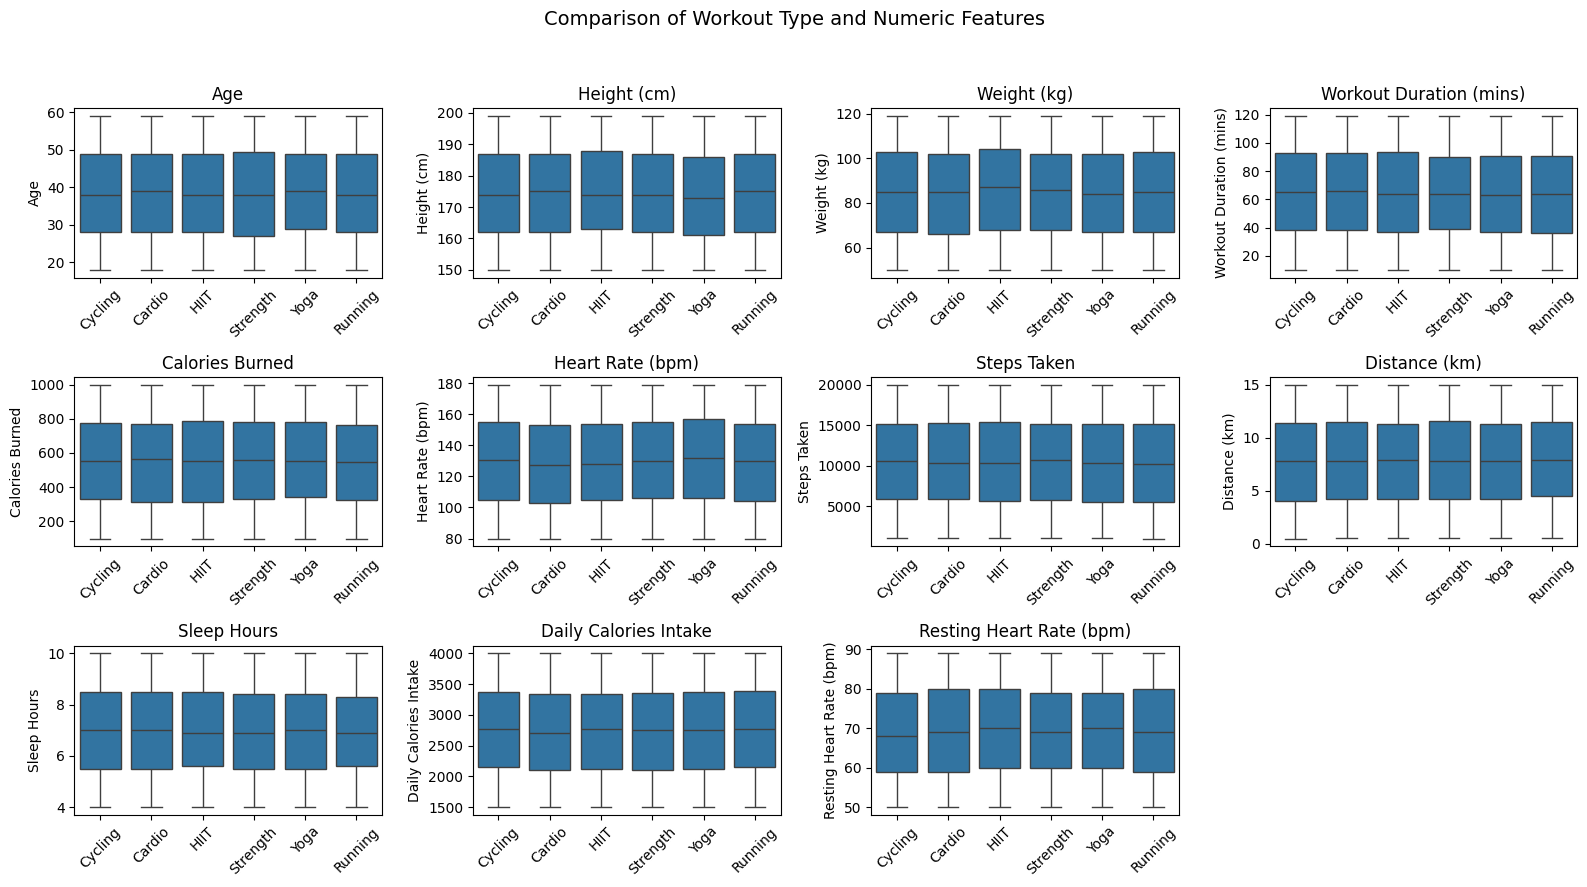

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
import pandas as pd

# Only use numeric columns
features = df_cont.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Set up subplot grid
n_features = len(features)
n_cols = 4
n_rows = -(-n_features // n_cols)  # Ceiling division

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axs = axs.flatten()

fig.suptitle('Comparison of Workout Type and Numeric Features', fontsize=14)

for i, feature in enumerate(features):
    plot_df = df_cont[[feature, 'Workout Type']].copy()

    # Ensure the feature is numeric and drop invalid values
    plot_df[feature] = pd.to_numeric(plot_df[feature], errors='coerce')
    plot_df = plot_df[plot_df[feature].notna() & (plot_df[feature] != 0)]

    # Check for log scale based on kurtosis
    try:
        log_scale = kurtosis(plot_df[feature]) > 10
    except Exception as e:
        log_scale = False

    sns.boxplot(data=plot_df, x='Workout Type', y=feature, log_scale=log_scale, ax=axs[i])
    axs[i].tick_params(axis='x', labelrotation=45)
    axs[i].set_title(feature)
    axs[i].set_xlabel('')

# Remove unused axes
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

In [6]:
scaled_df=funcs.standard_scaler(df)

I'm the scaler!
